In [1]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R

In [2]:
data = read_csv.read_csv(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\data\InGaN_FTIR.csv")
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0]) * 100
frequenz

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ge85rek\\Desktop\\Fabry-Perot\\data\\InGaN_FTIR.csv'

In [ ]:
wavelength = scipy.constants.c/frequenz
wavelength

array([1.25009849e-06, 1.25017385e-06, 1.25024921e-06, ...,
       2.49568399e-05, 2.49869084e-05, 2.50170494e-05])

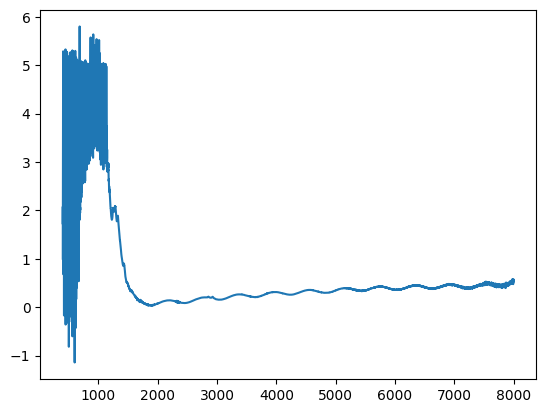

In [ ]:
plt.plot(data[0],data[1])

In [ ]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [ ]:
def flatten(cutoff, data, N = 1200):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[:cutoff], data[:cutoff]-smooth[:cutoff]

In [ ]:
cutoff = find_nearest(frequenz, 0.6e14)
smooth, smoothed_out = flatten(cutoff, data[1])
frequenz_s = frequenz[:cutoff]

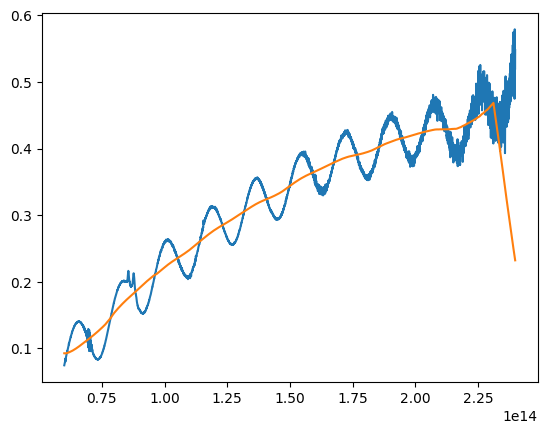

In [ ]:
plt.plot(frequenz_s,data[1][:cutoff])
plt.plot(frequenz_s,smooth)

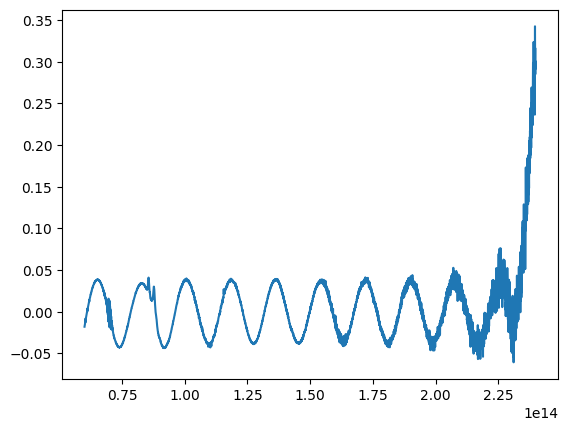

In [ ]:
plt.plot(frequenz_s,smoothed_out)

In [ ]:
minima_index= scipy.signal.argrelmin(smoothed_out,order = 150)
minima_index

(array([  602,  1585,  2823,  4020,  5300,  6524,  7769,  8968, 10229,
        11481], dtype=int64),)

In [ ]:
len(frequenz_s) == len(frequenz[:cutoff])

True

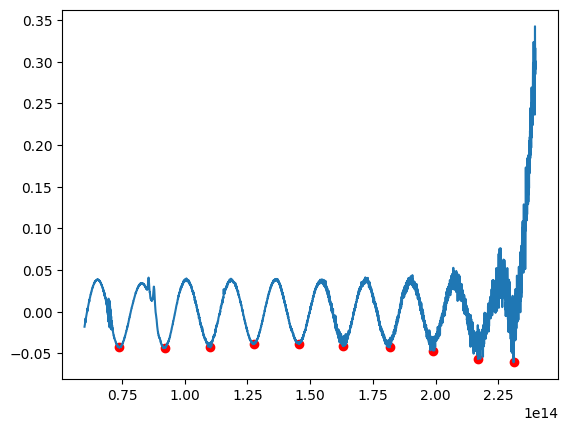

In [ ]:
minima_frequenz = []
minima_absorption = []
for minimum in minima_index[0]:
    minima_frequenz.append(frequenz[minimum])
    minima_absorption.append(smoothed_out[minimum])

plt.scatter(minima_frequenz,minima_absorption, color = 'red')
plt.plot(frequenz_s,smoothed_out)

In [ ]:
minima_frequenz

In [ ]:
def calculate_m(min_frequenz_array):
    m_array = []
    for i in range(0,len(min_frequenz_array)-1):
        m_array.append(min_frequenz_array[i+1]/(min_frequenz_array[i]-min_frequenz_array[i+1]))
    return m_array

m_array = calculate_m(minima_frequenz)
m_array

[15.264496456317048,
 11.120355404159199,
 10.50125313054804,
 8.820312507607538,
 8.223856203723898,
 7.0851405631200315,
 6.356964140812775,
 5.044409194276128,
 4.080670930861201]

In [ ]:
cleaned_m_array = np.arange(4,13,1)
cleaned_m_array = cleaned_m_array[::-1]

In [ ]:
#calculate the refractive index through the calculated m
def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

In [ ]:
n_array = []
for i in range(len(m_array)):
    n_array.append(refractive_index(cleaned_m_array[i],3.5e-6,minima_frequenz[i]))
n_array

9

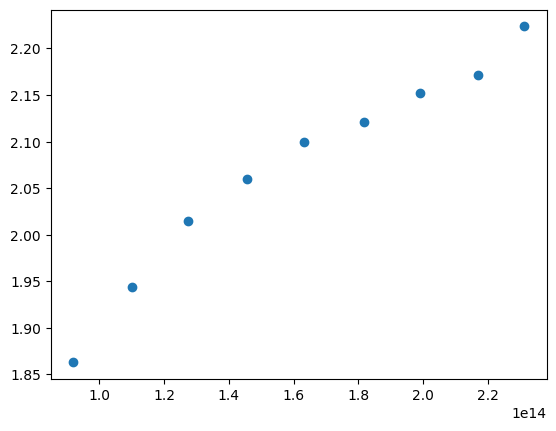

In [ ]:
plt.scatter(minima_frequenz[:-1],n_array)

In [ ]:
def polynomial(x,a0,a1,a2,a3,a4):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4

In [ ]:
import scipy.optimize
param, opt = scipy.optimize.curve_fit(polynomial,minima_frequenz[:-1],n_array)

In [ ]:
param

array([ 1.70027006e+00, -6.30953690e-15,  1.57510852e-28, -9.13871783e-43,
        1.69927520e-57])

In [ ]:
minima_frequenz

[231112920784248.38,
 216903263485298.6,
 199007479388830.06,
 181704366664508.4,
 163201455833132.44,
 145508047324959.47,
 127511075449332.81,
 110179051939531.42,
 91950793660150.27,
 73852634005365.44]

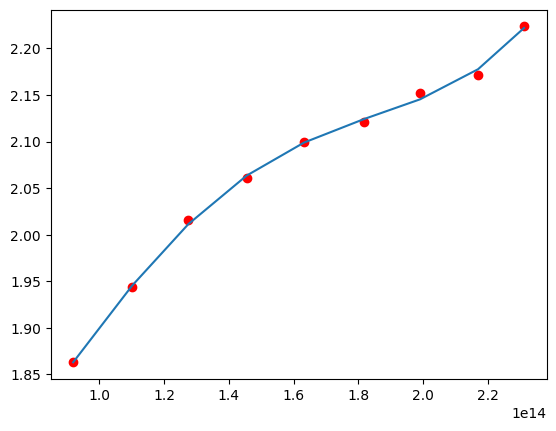

In [ ]:
plt.plot(minima_frequenz[:-1],polynomial(np.array(minima_frequenz[:-1]),*param))
plt.scatter(minima_frequenz[:-1],n_array,color = "red")

Modelling of the Transmission & Absorption using the calculated refractive index

In [ ]:
len(frequenz_s) == len(frequenz[:cutoff])

True

In [ ]:
Transmission = T_and_R.Transmission
Reflectance = T_and_R.reflectance

In [ ]:
T_array = []
for f in frequenz_s:
    wavelength_nm = scipy.constants.c/f * 1e9
    r = Reflectance(polynomial(f,*param),1)
    optdick = polynomial(f,*param) * 3.5e-6
    T_array.append(Transmission(lam = wavelength_nm,r = r, optdick = optdick))
    

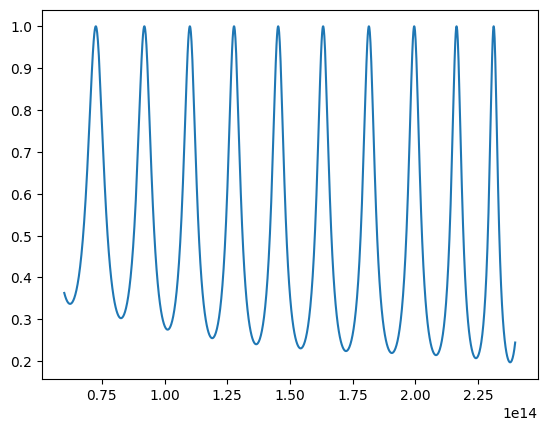

In [ ]:
plt.plot(frequenz_s,T_array)

In [ ]:
R_array = [1-T for T in T_array]

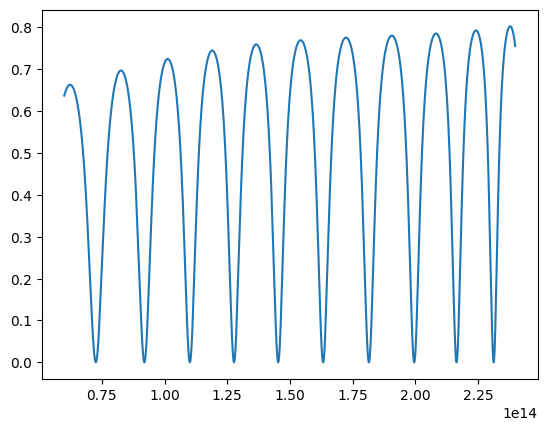

In [ ]:
plt.plot(frequenz_s,R_array)

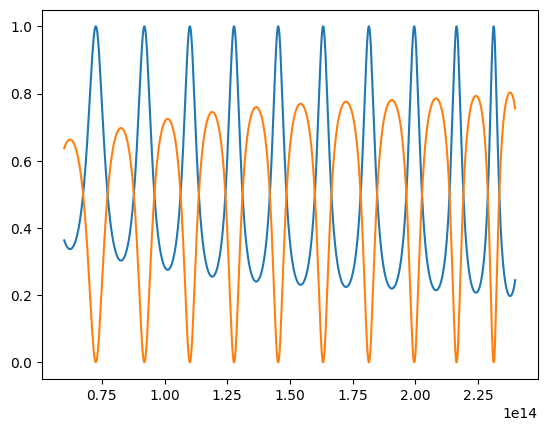

In [ ]:
plt.plot(frequenz_s,T_array)
plt.plot(frequenz_s,R_array)

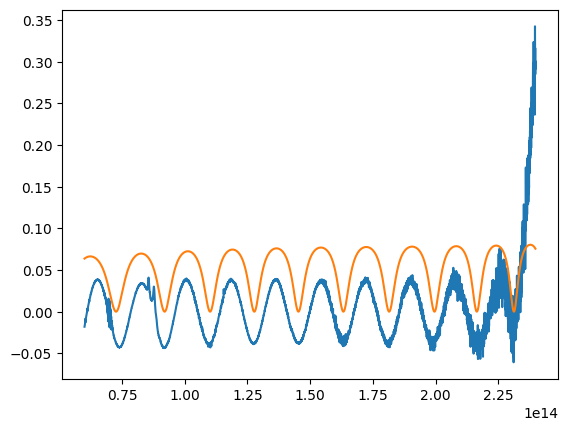

In [ ]:
plt.plot(frequenz_s,smoothed_out)
plt.plot(frequenz_s,0.1*np.array(R_array))

Estimating the length of the sample for data 2

In [ ]:
smooth2, smoothed_out2 = flatten(cutoff,data[2])

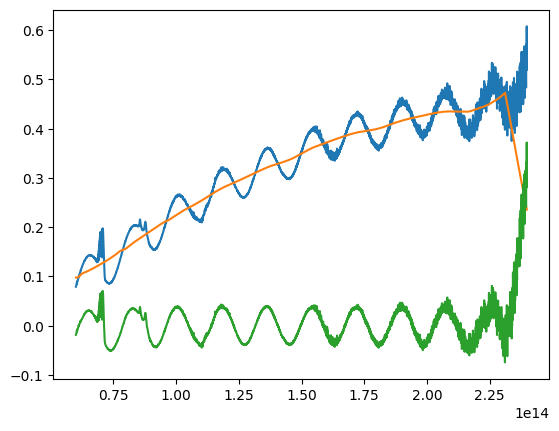

In [ ]:
plt.plot(frequenz_s,data[2][:cutoff])
plt.plot(frequenz_s,smooth2)
plt.plot(frequenz_s,smoothed_out2)

In [ ]:
#picking up the minima of smoothed_out2
minima_index2 = scipy.signal.argrelmin(smoothed_out2[:cutoff],order = 1000)
minima_frequenz2 = []
minima_absorption2 = []
for minimum in minima_index2[0]:
    minima_frequenz2.append(frequenz[minimum])
    minima_absorption2.append(smoothed_out[minimum])

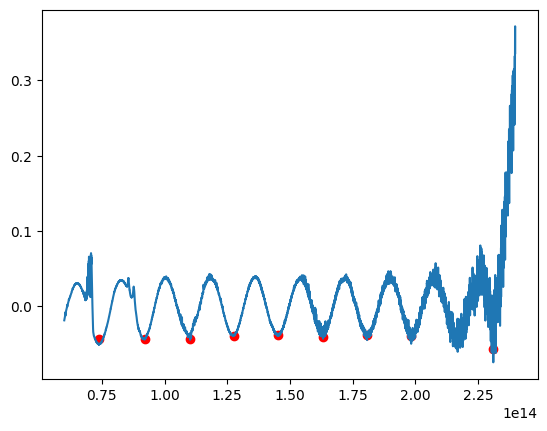

In [ ]:
plt.plot(frequenz_s,smoothed_out2)
plt.scatter(minima_frequenz2,minima_absorption2, color = 'red')

In [ ]:
def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

m_array2 = calculate_m(minima_frequenz2)
minima_frequenz2

[231098465391508.53,
 198342531023004.8,
 180750310323969.25,
 163201455833132.44,
 145204483957505.78,
 127511075449332.81,
 110179051939531.42,
 92095347647507.2,
 73852634005365.44]

In [ ]:
m_array2 = calculate_m(minima_frequenz2)
m_array2

[6.055163280999853,
 10.274445359469501,
 9.299835263797336,
 8.068273093995138,
 7.206699341759542,
 6.356964140812775,
 5.092725813268561,
 4.048335979728444]

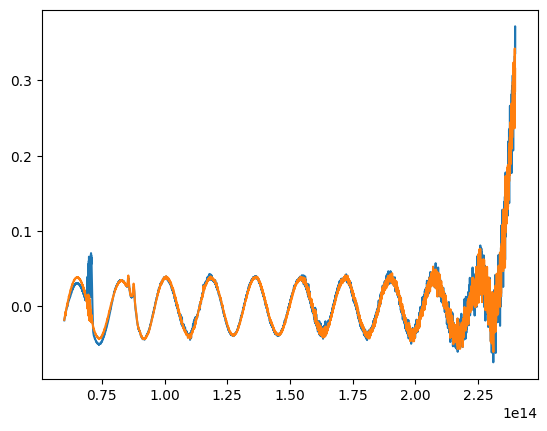

In [ ]:
plt.plot(frequenz_s,smoothed_out2)
plt.plot(frequenz_s,smoothed_out)

In [ ]:

cleaned_m_array2 = np.arange(4,12,1)[::-1]

In [ ]:
len(cleaned_m_array2)

8

In [ ]:
len(minima_frequenz2)

9

In [ ]:
L_array2 = []
for i in range(len(m_array2)):
    L_array2.append(länge(cleaned_m_array2[i],polynomial(minima_frequenz2[i],*param),minima_frequenz2[i]))

In [ ]:
L_array2

[3.211213782228843e-06,
 3.524309324232881e-06,
 3.5157403391535764e-06,
 3.500879897544979e-06,
 3.5033205620436106e-06,
 3.50688312569485e-06,
 3.496863181524039e-06,
 3.4936235301820264e-06]

Estimation Length for Data 3 (-160C)

In [ ]:
smooth3, smoothed_out3 = flatten(cutoff,data[3])
minima_index3 = scipy.signal.argrelmin(smoothed_out3,order = 500)
minima_frequenz3 = []
minima_absorption3 = []
for minimum in minima_index3[0]:
    minima_frequenz3.append(frequenz[minimum])
    minima_absorption3.append(smoothed_out3[minimum])
m_array3 = calculate_m(minima_frequenz3)
m_array3

[15.63163370872271,
 10.467175569551001,
 9.960831340534918,
 9.114448057215432,
 8.129268291436848,
 7.488115448103756,
 6.017501984452156,
 4.747720365349981,
 4.363090129319218]

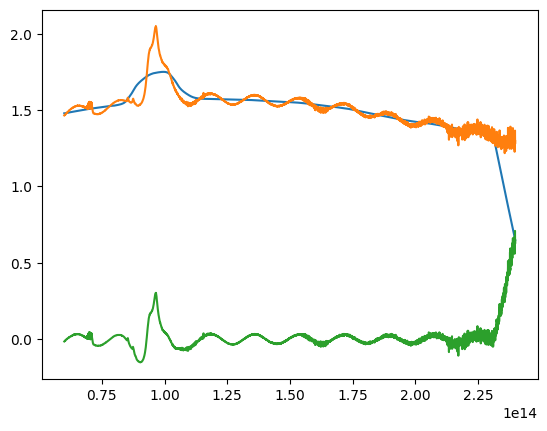

In [ ]:
plt.plot(frequenz_s,smooth3)
plt.plot(frequenz_s,data[3][:cutoff])
plt.plot(frequenz_s,smoothed_out3)


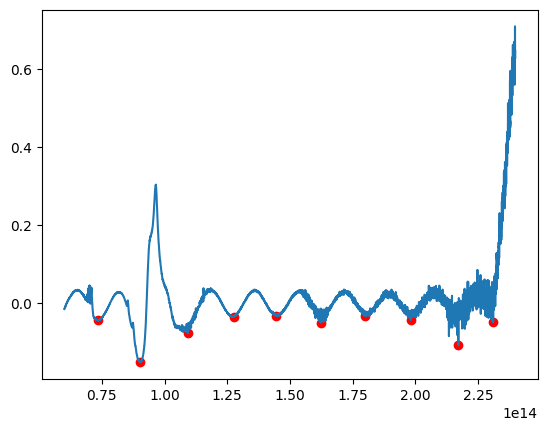

In [ ]:
plt.scatter(minima_frequenz3,minima_absorption3, color = 'red')
plt.plot(frequenz_s,smoothed_out3)

In [ ]:
cleaned_m_array3 = np.arange(4,13,1)[::-1]
L_array3 = []
for i in range(len(m_array3)):
    L_array3.append(länge(cleaned_m_array3[i],polynomial(minima_frequenz3[i],*param),minima_frequenz3[i]))
L_array3

[3.5043800192238106e-06,
 3.4860208998707595e-06,
 3.526911901926333e-06,
 3.5291143411186545e-06,
 3.522328513048329e-06,
 3.522224506542868e-06,
 3.50688312569485e-06,
 3.530106703688731e-06,
 3.5786967493217443e-06]